# Part I - (201902-fordgobike-tripdata.csv)
## by (John Ekwere)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.It consist of 16 columns and over 183,000 rows.


## Preliminary Wrangling


In [43]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df_bike = df.copy()

In [3]:
print(df_bike.shape)
print(df_bike.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None


The dataset contains 183412 rows and 16 columns with some missing data.

In [4]:
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


The dataset has about 183,412 rides. The average of the rides is approximately 726 seconds while the maximum and minimum rides are 85,444 and 61 seconds respectively.

In [5]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We have 8265 rows with missing member_birth_year and member_gender which accounts for about 4.5% of the data. we also have 197 rows missing from start and end station id and name.

In [6]:
df_bike.member_birth_year.describe()

count    175147.000000
mean       1984.806437
std          10.116689
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [7]:
df_bike.duplicated().sum()

0

There are no duplicate rows in the dataset.

#### Data Cleaning.
The following observations were made.
> rows with missing data will be dropped.

> incorrect data type for start and end time columns will be changed to datetime datatype

> id columns will be changed to object datatype as well.

> member_birth_year will also be changed from float to int

> data type for user_type, member_gender and bike_share_for_all_trip will be changed to category datatype

In [8]:
#Drop rows with missing values.
df_bike.dropna(inplace = True)
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [9]:
#format for start and end time changed to datetime
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

In [10]:
#The columns with id were changed from float and int to string because they will not be used for calculations
df_bike['start_station_id'] = df_bike['start_station_id'].astype(str)
df_bike['end_station_id'] = df_bike['end_station_id'].astype(str)
df_bike['bike_id'] = df_bike['bike_id'].astype(str)

In [11]:
# change member birth year to int as year of birth can not be float.
df_bike['member_birth_year'] = df_bike['member_birth_year'].astype(int)

In [12]:
#create a new column for age to help with age distribution of members
df_bike['age'] = 2022 - df_bike['member_birth_year']

In [13]:
df_bike.age.describe()

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: age, dtype: float64

from the dataset, maximum age is 144, minimum age is 21 while mean age is 37.

In [14]:
# the following will be changed to type category
df_bike['user_type'] = df_bike['user_type'].astype('category')
df_bike['member_gender'] = df_bike['member_gender'].astype('category')
df_bike['bike_share_for_all_trip'] = df_bike['bike_share_for_all_trip'].astype('category')

In [15]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
age                        174952 non-null int64
dtypes: category

### What is the structure of your dataset?

> The dataset contains 183412 rows and 16 columns with some missing data. The dataset has about 183,412 rides. The average of the rides is approximately 726 seconds while the maximum and minimum rides are 85,444 and 61 seconds respectively. 

### What is/are the main feature(s) of interest in your dataset?

> From the 16 columns, I will focus more on the following columns; duration_sec, start_station_name, end_station_name, bike_id, user_type, member_gender, member_birth_year

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help support my investigation are user_type, member_gender, member_birth_year and duration_sec

## Univariate Exploration

> In this section, I will investigate distributions of individual variables and prepare myself to look at relationships between variables.


#### Question 1: What age grade uses Ford Gobike Systems the most?

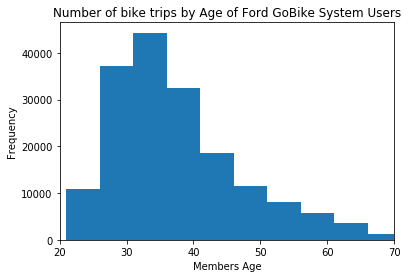

In [16]:
bins = np.arange(df_bike['age'].min(), df_bike['age'].max()+5, 5)
plt.hist(data = df_bike, x = 'age', bins = bins)
plt.title("Number of bike trips by Age of Ford GoBike System Users")
plt.xlabel('Members Age')
plt.ylabel('Frequency')
plt.xlim(20,70);

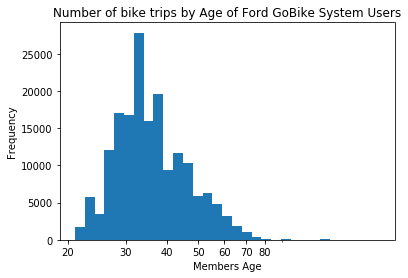

In [17]:
bins = 10 ** np.arange(np.log10(df_bike['age']).min(), np.log10(df_bike['age']).max()+0.1, 0.03)
ticks = [20, 30, 40, 50, 60, 70, 80]
labels = [20, 30, 40, 50, '60', '70', 80]
plt.hist(data = df_bike, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
#plt.xlim(20,70)
plt.title("Number of bike trips by Age of Ford GoBike System Users")
plt.xlabel('Members Age')
plt.ylabel('Frequency');

##### Observation 1: The age with the mode of users is around 35 and most of the users are between 30 and 40

#### Question 2: What gender uses Ford GoBike Systems the more?

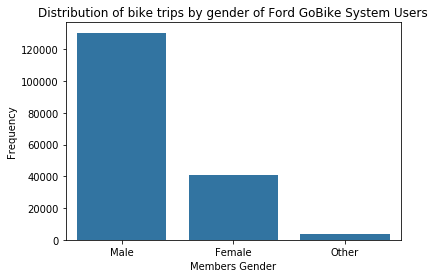

In [18]:
order = df_bike.member_gender.value_counts()
base_color = sb.color_palette()[0]
sb.countplot(data=df_bike , x='member_gender', color=base_color , order=order.index)
plt.title("Distribution of bike trips by gender of Ford GoBike System Users")
plt.xlabel('Members Gender')
plt.ylabel('Frequency');

##### Observation 2: From the visualisation, males use the bike trips more

#### Question 3: Which category of users use the bike trips more?

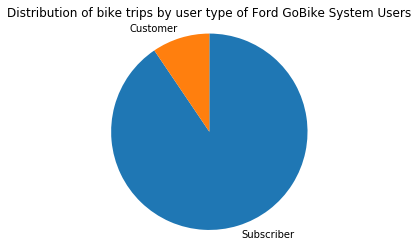

In [19]:
order_user = df_bike.user_type.value_counts()
plt.pie(order_user, labels = order_user.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title("Distribution of bike trips by user type of Ford GoBike System Users");

##### Observation 3: From the visuals, more subcribers tend to use the bike trips than customers

#### Question 4: Do people prefer to share bikes?

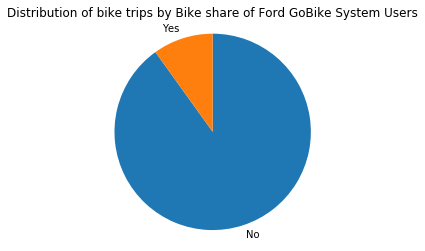

In [20]:
order_bike_share = df_bike.bike_share_for_all_trip.value_counts()
plt.pie(order_bike_share, labels = order_bike_share.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title("Distribution of bike trips by Bike share of Ford GoBike System Users");

##### Observation 4: From the visuals, most people prefer not to share bikes on their trip.

In [21]:
print("Start station count is "+str(len(df_bike.start_station_name.value_counts())))
print("End station count is "+str(len(df_bike.end_station_name.value_counts())))

Start station count is 329
End station count is 329


Since the stations are much, we will look at the top 10 and last 5 for both start and end stations.

#### Question 5: Which are the top 10 start stations with the highest patronage (where do bikers start their trips the most?)

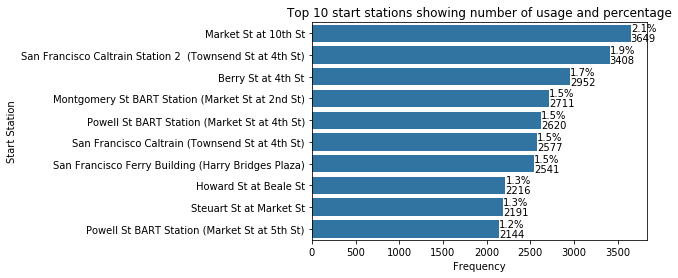

In [22]:
base_color = sb.color_palette()[0]
order_station = df_bike.start_station_name.value_counts().head(10)
sb.countplot(data=df_bike , y='start_station_name' , color=base_color , order=order_station.index);

# Putting percentage  
counts = df_bike.start_station_name.value_counts().head(10)
for i in range(counts.shape[0]):
    count = counts[i]
    pct_string = '{:0.1f}%'.format(100*count/df_bike.shape[0])
    plt.text(count+1, i, count, va = 'top')
    plt.text(count+1, i, pct_string, va = 'bottom')
plt.title("Top 10 start stations showing number of usage and percentage")
plt.xlabel('Frequency')
plt.ylabel('Start Station');

##### Observation 5: From the visuals, MARKET ST AT 10TH ST is the most used Ford Gobike station with 2.1% and 3649 rides, followed by SAN FRANCISCO CALTRAIN STATION 2 with 1.9% and 3408 rides.

#### Question 6: Which are the top 10 end stations with the highest patronage (where do bikers end their trips the most?)

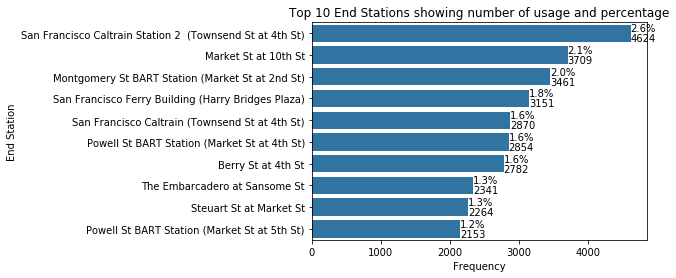

In [23]:
base_color = sb.color_palette()[0]
order_station_end = df_bike.end_station_name.value_counts().head(10)
sb.countplot(data=df_bike , y='end_station_name' , color=base_color , order=order_station_end.index);

# Putting percentage  
counts = df_bike.end_station_name.value_counts().head(10)
for i in range(counts.shape[0]):
    count = counts[i]
    pct_string = '{:0.1f}%'.format(100*count/df_bike.shape[0])
    plt.text(count+1, i, count, va = 'top')
    plt.text(count+1, i, pct_string, va = 'bottom')
plt.title("Top 10 End Stations showing number of usage and percentage")
plt.xlabel('Frequency')
plt.ylabel('End Station');

##### Observation 6: From the visuals we can see that San Francisco Clatrain Station 2 is where people alighted the most followed by Market St at 10th St. This also shows that people are mostly moving between these 2 stations as they are the 2 most used stations with regards to both start and end stations.

#### Question 7: Which stations are the 5 least start stations patronised?

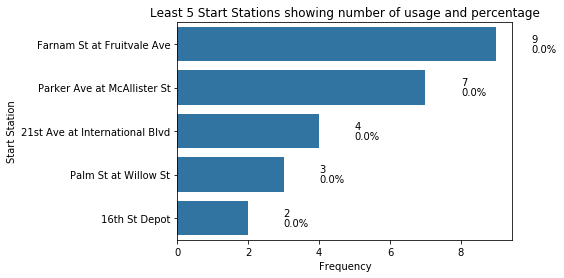

In [44]:
base_color = sb.color_palette()[0]
order_station = df_bike.start_station_name.value_counts().tail(5)
sb.countplot(data=df_bike , y='start_station_name' , color=base_color , order=order_station.index);

# Putting percentage  
counts = df_bike.start_station_name.value_counts().tail(5)
for i in range(counts.shape[0]):
    count = counts[i]
    pct_string = '{:0.1f}%'.format(100*count/df_bike.shape[0])
    plt.text(count+1, i, count, va = 'bottom');
    plt.text(count+1, i, pct_string, va = 'top')
plt.title("Least 5 Start Stations showing number of usage and percentage")
plt.xlabel('Frequency')
plt.ylabel('Start Station');

##### Observation 7: From the visuals we can see that the least 5 stations amount to 0% which is quite negligible

#### Question 8: Which stations are the 5 least end stations patronised?

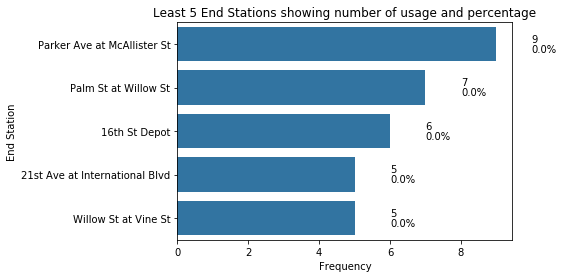

In [25]:
base_color = sb.color_palette()[0]
order_station_end = df_bike.end_station_name.value_counts().tail(5)
sb.countplot(data=df_bike , y='end_station_name' , color=base_color , order=order_station_end.index);

# Putting percentage  
counts = df_bike.end_station_name.value_counts().tail(5)
for i in range(counts.shape[0]):
    count = counts[i]
    pct_string = '{:0.1f}%'.format(100*count/df_bike.shape[0])
    plt.text(count+1, i, count, va = 'bottom');
    plt.text(count+1, i, pct_string, va = 'top')
plt.title("Least 5 End Stations showing number of usage and percentage")
plt.xlabel('Frequency')
plt.ylabel('End Station');

##### Observation 8: From the visuals, we can see that the 5 least end stations also contributed 0%.

#### Question 9: What is the mode of the bike trips?

In [45]:
df_bike['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

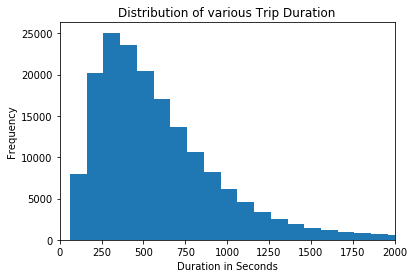

In [46]:
bins = np.arange(df_bike['duration_sec'].min(), df_bike['duration_sec'].max() + 100 , 100)
plt.hist(data = df_bike , x = 'duration_sec' , bins = bins)
plt.xlim(0,2000)
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency');

In [47]:
np.log10(df_bike['duration_sec']).describe()

count    174952.000000
mean          2.707824
std           0.305190
min           1.785330
25%           2.509203
50%           2.707570
75%           2.897077
max           4.927103
Name: duration_sec, dtype: float64

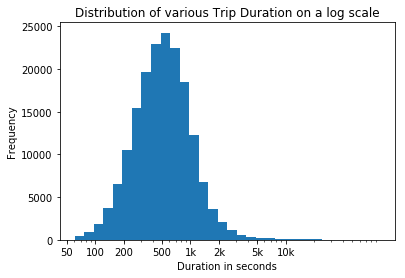

In [48]:
bins = 10 ** np.arange(np.log10(df_bike['duration_sec']).min(), np.log10(df_bike['duration_sec']).max()+0.1, 0.1)
ticks = [50, 100, 200, 500, 1000, 2000, 5000, 10000]
labels = [50, 100, 200, 500, '1k', '2k', '5k', '10k']#['{}'.format(v) for v in ticks]
plt.hist(data = df_bike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title("Distribution of various Trip Duration on a log scale")
plt.xlabel('Duration in seconds')
plt.ylabel('Frequency');

#### Observation 9: most trips were around 500 seconds. Most trips were at slightly greater than 500 seconds using a log scale.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> For age and trip duration, both plots were skewed but using log transformation, I was able to get a unimodal distribution for both.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I dropped rows with missing values and changed incorrect datatype for ease of use.

## Bivariate Exploration

> In this section, I investigated relationships between pairs of variables in the data.

#### Question 10: what is the relationship between gender and trip duration?

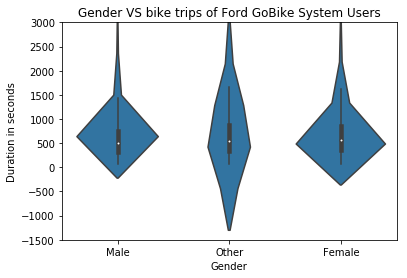

In [49]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim(-1500,3000)
plt.title("Gender VS bike trips of Ford GoBike System Users")
plt.xlabel('Gender')
plt.ylabel('Duration in seconds')
plt.show()

#### Observation 10: From the visuals, most trips across all genders were just around 500. While most males made rides of 1500 and less, others and females made much longer trips.

#### Question 11: What is the distribution of trip duration among user types?

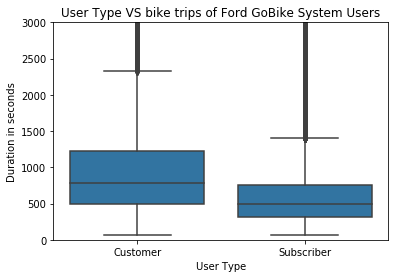

In [50]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df_bike, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim(0,3000)
plt.title("User Type VS bike trips of Ford GoBike System Users")
plt.xlabel('User Type')
plt.ylabel('Duration in seconds')
plt.show()

#### Observation 11: We can see that customers made more bike trips than subscribers. The plot also shows that q1 for customers is slightly higher than that mean of subscribers.

#### Question 12: Which gender take longer trips?

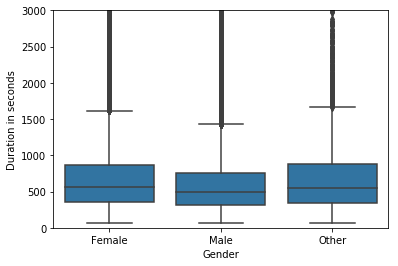

In [42]:
base_color = sb.color_palette()[0]
sb.boxplot(data=df_bike, x='member_gender' ,y='duration_sec', color = base_color)
plt.ylim(0,3000)
plt.xlabel('Gender')
plt.ylabel('Duration in seconds');

#### Observation 12: Females made longer trips than males and others

#### Question 13: How does age affect trip duration?

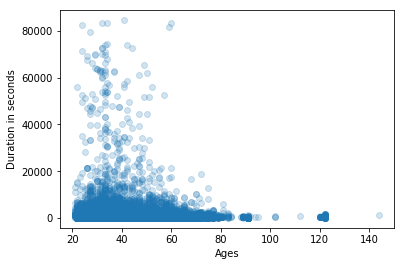

In [32]:
plt.scatter(data=df_bike, x='age' ,y='duration_sec', alpha=2/10)
plt.xlabel('Ages')
plt.ylabel('Duration in seconds');

#### Observation 13: From the visuals we can see that most trips were done by bikers between 20 and 60. Also, the older bikers did not engage in long distance. The longest trips were done by bikers between the ages of 20 and 50. Most of the trips were also done in less than 10,000 seconds.

#### Question 14: What is the distribution of user type among Member gender?

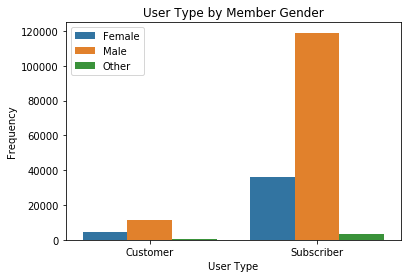

In [33]:
sb.countplot(data = df_bike, x = 'user_type', hue = 'member_gender')
plt.ylabel('Frequency')
plt.xlabel('User Type')
plt.legend();
plt.title('User Type by Member Gender');

#### Observation 14: Males make up 50% of customers and 70% of subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most trips were under 10,000 seconds and riders were mostly under 60 years.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> we have more males both as subscribers and as customers

## Multivariate Exploration

> I created plots of three variables to investigate the data even
further.

#### Question 15: What is the relationship between gender, age and duration?

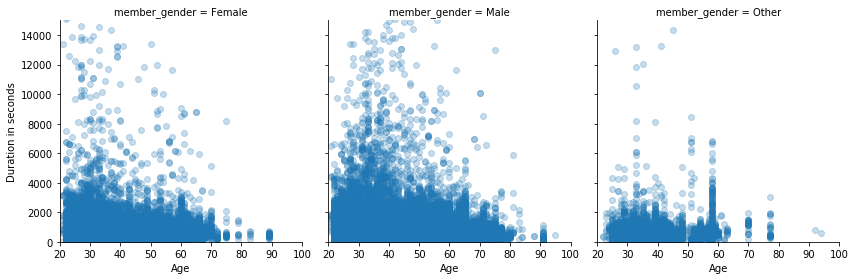

In [61]:
g = sb.FacetGrid(data = df_bike, col = 'member_gender', col_wrap = 3, size = 4, xlim = [20, 100], ylim = [0, 15000])
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
g.set_xlabels('Age')
g.set_ylabels('Duration in seconds')
plt.show()

#### Observation 15: From the visuals we can see that trip duration for other gender was mostly below 2000 while that of female was between 0 and 4000 although it decreases with age. The trip duration for male also decreased with age. I also observed that males took longer trips. Males between 70 and 80 also had a good number of trips compared to female and other gender.

#### Question 16: What is the relationship between gender, duration and user type?

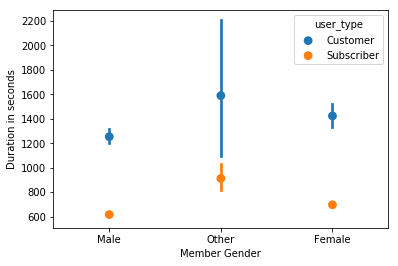

In [66]:
sb.pointplot(data=df, x='member_gender', y='duration_sec', hue='user_type', linestyles="");
plt.xlabel('Member Gender');
plt.ylabel('Duration in seconds');

#### Observation 16: From the visuals we can see that customers "other customers" make the longest trip duration. male and female subscribers took the shortest trips.

#### Question 17: What is the relationship between age, member gender and user type?

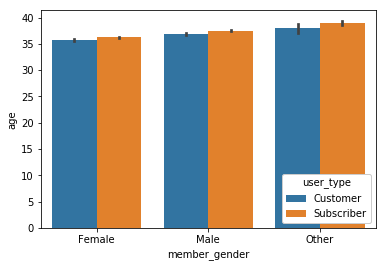

In [34]:
g = sb.barplot(data = df_bike, x = 'member_gender', y='age', hue='user_type')
g.legend(loc = 4, ncol=1, framealpha=1, title='user_type');

#### Observation 17: We can see that females have the lowest mean age for both types of users followed by males.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As expected, males took more trips even at age 80.

### Were there any interesting or surprising interactions between features?

> Surprisingly, others gender category made the longest trips

## Conclusions
>Most trips were under 10,000 seconds and females took more trips than by males. The average age of people who rented bikes was below 40. Most people that rented the bikes were below 65 but males between 70 and 80 still rented more than femmale and other genders. 
